In [1]:
import math
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [2]:
FindLayerNodesLinear(3, 175, 100)

[175, 138, 100]

In [4]:
from scikeras.wrappers import KerasRegressor

Peak Index: 4
Lowest Point Index: 19
Zero Crossing Index: 24
Plot saved as pressure_plot.png


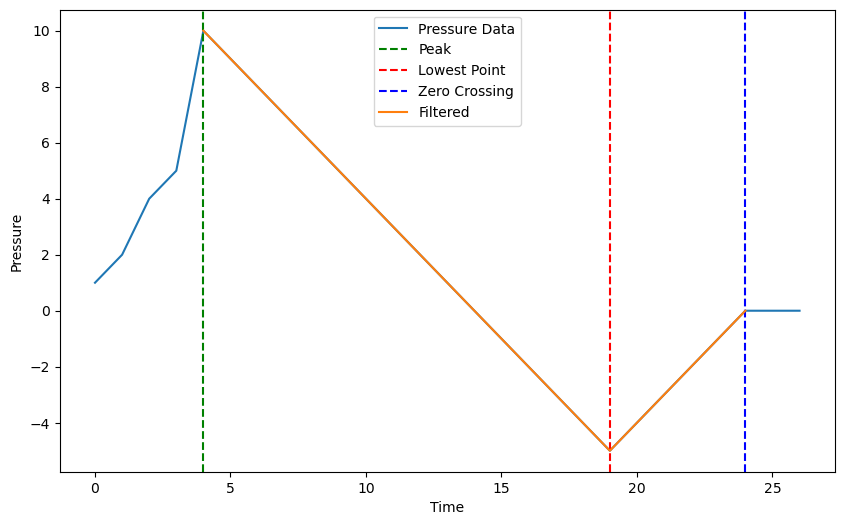

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example pressure data
pressure = np.array([1, 2, 4, 5, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, -1, -2, -3, -4, -5, -4, -3, -2, -1, 0, 0, 0])
time = np.arange(len(pressure))  # Dummy time array

# Find the index of the peak value
peak_index = np.argmax(pressure)

# Find the index of the lowest (most negative) value after the peak
lowest_index = peak_index + np.argmin(pressure[peak_index:])

# Find the first zero crossing after the lowest value
zero_crossing_index = next((i for i, val in enumerate(pressure[lowest_index:], start=lowest_index) if val >= 0), None)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time, pressure, label='Pressure Data')
plt.axvline(x=peak_index, color='g', linestyle='--', label='Peak')
plt.axvline(x=lowest_index, color='r', linestyle='--', label='Lowest Point')
plt.axvline(x=zero_crossing_index, color='b', linestyle='--', label='Zero Crossing')
plt.plot(time[peak_index: zero_crossing_index+1], pressure[peak_index: zero_crossing_index+1], label='Filtered')

plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()

# Save the plot as an image file
plot_file_path = 'pressure_plot.png'
plt.savefig(plot_file_path)

print(f"Peak Index: {peak_index}")
print(f"Lowest Point Index: {lowest_index}")
print(f"Zero Crossing Index: {zero_crossing_index}")
print(f"Plot saved as {plot_file_path}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from rdp import rdp

# Sample data (you can replace this with your actual data)
time = np.linspace(0, 10, 1000)  # 1000 time points from 0 to 10
pressure = np.sin(time) + 0.1 * np.random.randn(1000)  # Sine wave with noise

# Combine time and pressure into a single array of 2D points
points = np.column_stack((time, pressure))

# Apply the RDP algorithm to reduce the number of points
epsilon = 0.05  # Tolerance parameter (adjust as needed)
reduced_points = rdp(points, epsilon=epsilon)

# Separate the reduced points into time and pressure
reduced_time = reduced_points[:, 0]
reduced_pressure = reduced_points[:, 1]

# Plot the original and reduced data
plt.figure(figsize=(10, 5))
plt.plot(time, pressure, label='Original Data', alpha=0.5)
plt.plot(reduced_time, reduced_pressure, label='Reduced Data', marker='o')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.legend()
plt.title('Original vs. Reduced Data')
plt.show()

In [19]:
import numpy as np
start_value = 1.524943472









end_value = 1.26727344










interpolated_values = np.linspace(start_value, end_value, 47)
print (interpolated_values)

[1.52494347 1.51934195 1.51374043 1.5081389  1.50253738 1.49693586
 1.49133434 1.48573281 1.48013129 1.47452977 1.46892825 1.46332673
 1.4577252  1.45212368 1.44652216 1.44092064 1.43531911 1.42971759
 1.42411607 1.41851455 1.41291302 1.4073115  1.40170998 1.39610846
 1.39050693 1.38490541 1.37930389 1.37370237 1.36810084 1.36249932
 1.3568978  1.35129628 1.34569475 1.34009323 1.33449171 1.32889019
 1.32328866 1.31768714 1.31208562 1.3064841  1.30088257 1.29528105
 1.28967953 1.28407801 1.27847648 1.27287496 1.26727344]


In [20]:
import numpy as np

def process_array(A):
    # Convert to numpy array for convenience
    A = np.array(A)
    
    # Find the index of the peak value
    peak_index = np.argmax(A)
    
    # Extract the subarray from peak to start
    subarray = A[:peak_index + 1]
    
    # Sort subarray to find the value closest to zero
    sorted_subarray = sorted(subarray, key=lambda x: abs(x))
    
    # Find the value closest to zero
    closest_to_zero = sorted_subarray[0]
    
    # Update the original array
    result = np.zeros_like(A)
    result[:peak_index + 1] = closest_to_zero
    
    return result

# Example usage
A = [3, 8, 7, 2, 1, 4, 10, 5, 6]
result = process_array(A)
print("Original Array:", A)
print("Processed Array:", result)

Original Array: [3, 8, 7, 2, 1, 4, 10, 5, 6]
Processed Array: [1 1 1 1 1 1 1 0 0]
